In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

cwd = os.getcwd()
print("Current Working Directory:", cwd)
os.chdir(os.path.expanduser("~/clef/animalclef-2025"))
print("Changed Working Directory to:", os.getcwd())

Current Working Directory: /storage/home/hcoda1/2/cmarutha3/clef/animalclef-2025/user/chand2020
Changed Working Directory to: /storage/home/hcoda1/2/cmarutha3/clef/animalclef-2025


In [3]:
from animalclef.spark import get_spark
from pyspark.sql import functions as F, Window
from pathlib import Path
import numpy as np
from animalclef.dataset import split_reid_data, summarize_split
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spark = get_spark(cores=4, memory="4g")
display(spark)

metadata = spark.read.parquet(f"{Path.home()}/shared/animalclef/data/parquet/metadata")

embeddings = spark.read.parquet(
    f"{Path.home()}/shared/animalclef/data/embeddings/dinov2"
)

db_embeddings = spark.read.parquet(
    f"{Path.home()}/p-dsgt_clef2025-0/embeddings/MegaDescriptor-L-384/db_embeddings.parquet"
)
db_embeddings = db_embeddings.withColumn(
    "tokens", F.concat_ws(",", *db_embeddings.columns)
)
query_embeddings = spark.read.parquet(
    f"{Path.home()}/p-dsgt_clef2025-0/embeddings/MegaDescriptor-L-384/query_embeddings.parquet"
)
query_embeddings = query_embeddings.withColumn(
    "tokens", F.concat_ws(",", *query_embeddings.columns)
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/21 23:03:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/21 23:03:02 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [40]:
row_count = metadata.count()
column_count = len(metadata.columns)
print(f"Shape: ({row_count}, {column_count})")

Shape: (15209, 8)


In [41]:
metadata.columns

['image_id',
 'identity',
 'path',
 'date',
 'orientation',
 'species',
 'split',
 'dataset']

In [42]:
row_count = embeddings.count()
column_count = len(embeddings.columns)
print(f"Shape: ({row_count}, {column_count})")

Shape: (15209, 2)


In [43]:
embeddings.columns

['image_id', 'token']

In [10]:
embeddings["token"].count()

TypeError: 'Column' object is not callable

In [44]:
row_count = db_embeddings.count()
column_count = len(db_embeddings.columns)
print(f"Shape: ({row_count}, {column_count})")

Shape: (13074, 1537)


In [46]:
db_embeddings.columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [47]:
row_count = query_embeddings.count()
column_count = len(query_embeddings.columns)
print(f"Shape: ({row_count}, {column_count})")

Shape: (2135, 1537)


In [48]:
query_embeddings.columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [54]:
metadata = metadata.withColumn(
    "row_number", F.row_number().over(Window.orderBy(F.lit(1)))
)
db_embeddings = db_embeddings.withColumn(
    "row_number", F.row_number().over(Window.orderBy(F.lit(1)))
).withColumn("split", F.lit("database"))
query_embeddings = query_embeddings.withColumn(
    "row_number", F.row_number().over(Window.orderBy(F.lit(1)))
).withColumn("split", F.lit("query"))
combined_embeddings = db_embeddings.unionByName(query_embeddings)

df = metadata.join(combined_embeddings, on=["row_number", "split"]).select(
    "image_id",
    "tokens",
    "identity",
    "dataset",
    "split",
    "row_number",
    F.count("image_id").over(Window.partitionBy("identity")).alias("identity_count"),
)
df.printSchema()
df.show()

root
 |-- image_id: integer (nullable = true)
 |-- tokens: string (nullable = false)
 |-- identity: string (nullable = true)
 |-- dataset: string (nullable = true)
 |-- split: string (nullable = true)
 |-- row_number: integer (nullable = false)
 |-- identity_count: long (nullable = false)



25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 1

+--------+--------------------+--------+----------------+-----+----------+--------------+
|image_id|              tokens|identity|         dataset|split|row_number|identity_count|
+--------+--------------------+--------+----------------+-----+----------+--------------+
|   14894|-0.0636343,-0.251...|    NULL| SeaTurtleID2022|query|         3|           290|
|   15167|-0.15879753,-0.20...|    NULL| SeaTurtleID2022|query|        11|           290|
|    5820|0.07117198,-0.258...|    NULL|SalamanderID2025|query|        15|           290|
|    3474|-0.3315625,0.3742...|    NULL|      LynxID2025|query|        21|           290|
|    3357|0.49388802,0.4656...|    NULL|      LynxID2025|query|        29|           290|
|   14993|0.17920308,-0.273...|    NULL| SeaTurtleID2022|query|        35|           290|
|     673|0.049770508,-0.69...|    NULL|      LynxID2025|query|        37|           290|
|    5649|0.023591975,-0.09...|    NULL|SalamanderID2025|query|        43|           290|
|     228|

In [55]:
pdf = df.toPandas()
cond = (~pdf.identity.isnull()) & (pdf.identity_count > 2)
train_df, val_df, test_df = split_reid_data(pdf[cond])
summarize_split(train_df, val_df, test_df)

25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 18:14:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/21 1

,Split,Num Individuals,Num Images,Train Image Overlap,Val Image Overlap,Test Image Overlap,Train Image %,Val Image %,Test Image %,Known Individuals,Unknown Individuals
0,Train,384,3415,3415,0,0,100.0,0.0,0.0,384,0
1,Validation,435,2361,0,2361,0,0.0,100.0,0.0,384,51
2,Test,590,4940,0,0,4940,0.0,0.0,100.0,384,206


In [56]:
train_df.head(5)

,image_id,tokens,identity,dataset,split,row_number,identity_count
295,1227,"0.05731233,-0.2638738,0.23341656,0.043962505,-...",LynxID2025_lynx_01,LynxID2025,database,600,23
298,638,"-0.25406858,-0.51554424,-0.012394025,0.1110071...",LynxID2025_lynx_01,LynxID2025,database,917,23
302,3016,"0.17912231,-0.5447816,0.52325803,-0.38615555,0...",LynxID2025_lynx_01,LynxID2025,database,2586,23
303,2832,"0.69350296,-0.78682846,-0.09782251,-0.600722,1...",LynxID2025_lynx_01,LynxID2025,database,5328,23
305,3049,"0.11147049,-0.21795256,1.502762,-0.27269045,-1...",LynxID2025_lynx_01,LynxID2025,database,5605,23


### k-nn model

In [58]:
import faiss
from animalclef.metrics import BAKS, BAUS

X_train = np.stack(train_df.tokens.values)
X_val = np.stack(val_df.tokens.values)
X_test = np.stack(test_df.tokens.values)

# Create a FAISS index for efficient nearest neighbor search
index = faiss.IndexFlatL2(X_train.shape[1])
index.add(X_train)

# Perform a search for the validation set
# use the nearest neighbor for now for voting
k = 1
# Distances and indices for validation set
dist_val, idx_val = index.search(X_val, k)
display(dist_val)

# Calculate the accuracy for validation and test sets
# do the actual prediction

# identities in val not in train
predictions_val = train_df.iloc[idx_val.flatten()]["identity"].values
identity_val_only = sorted(
    set(val_df.identity.unique()) - set(train_df.identity.unique())
)

display(
    BAKS(val_df["identity"].values, predictions_val, identity_val_only),
    BAUS(val_df["identity"].values, predictions_val, identity_val_only, "unknown"),
)

IndexError: tuple index out of range

In [5]:
# let's find the min/average distance to every other individual in test set.
# let's create a function to cache the distances
from functools import lru_cache
from tqdm import tqdm


def get_min_distance_to_neighbor(train_df):
    @lru_cache(maxsize=16)
    def get_index(individual):
        """get all embeddings that do not belong to an individual. This will form
        the minimum intercluster distance."""
        sub = train_df[train_df.identity != individual]
        # Use the dimension of the embedding vectors
        embedding_dim = len(sub.cls.iloc[0])  # Get dimension from first embedding
        index = faiss.IndexFlatL2(embedding_dim)
        index.add(np.stack(sub.cls.values))
        return index

    distances = []
    # order the training set by identity so that our lru cache is more efficient
    train_df = train_df.sort_values(by="identity")
    for row in tqdm(train_df.itertuples(), total=len(train_df)):
        # get the index for the individual
        index = get_index(row.identity)
        # search for the nearest neighbor in the training set
        dist, _ = index.search(np.array([row.cls]), 1)
        # get the distance to the nearest neighbors
        distances.append(dist[0][0])
    return np.array(distances)


# get stats on the distances
distances = get_min_distance_to_neighbor(train_df)
print(f"Min distance: {distances.min()}")
print(f"Max distance: {distances.max()}")
print(f"Mean distance: {distances.mean()}")
print(f"Std distance: {distances.std()}")
# IQR
q1 = np.percentile(distances, 25)
q2 = np.percentile(distances, 50)
q3 = np.percentile(distances, 75)
iqr = q3 - q1
print(f"IQR: {iqr}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
# MAD
print(f"Median: {q2}")
mad = np.median(np.abs(distances - np.median(distances)))
print(f"MAD: {mad}")

100%|██████████| 3392/3392 [00:05<00:00, 632.89it/s]

Min distance: 212.42611694335938
Max distance: 2218.32666015625
Mean distance: 661.2113647460938
Std distance: 327.97552490234375
IQR: 415.0047912597656
Q1: 414.3826599121094
Q3: 829.387451171875
Median: 564.4346923828125
MAD: 179.30845642089844


In [13]:
# now let's figure out a good threshold on the validation set


def make_prediction(train_df, other_df, threshold, new_label="new_individual"):
    # Create a FAISS index for efficient nearest neighbor search
    X_train = np.stack(train_df.cls.values)
    X_other = np.stack(other_df.cls.values)

    index = faiss.IndexFlatL2(X_train.shape[1])
    index.add(X_train)

    dist, idx = index.search(X_other, 1)
    predictions = train_df.iloc[idx.flatten()]["identity"].values
    # if the distance is above a threshold, it's unknown
    for i, v in enumerate(dist.flatten()):
        if v > threshold:
            predictions[i] = new_label
    return predictions


def search_threshold(train_df, other_df, thresholds):
    identity_other_only = sorted(
        set(other_df.identity.unique()) - set(train_df.identity.unique())
    )

    scores = []
    for threshold in tqdm(thresholds):
        predictions = make_prediction(train_df, other_df, threshold)
        baks = BAKS(val_df["identity"].values, predictions, identity_other_only)
        baus = BAUS(
            val_df["identity"].values,
            predictions,
            identity_other_only,
            "new_individual",
        )
        # geometric average
        score = np.sqrt(baks * baus)
        scores.append(
            {
                "threshold": threshold,
                "baks": baks,
                "baus": baus,
                "score": score,
            }
        )
    return pd.DataFrame(scores)


base_threshold_df = search_threshold(train_df, val_df, np.linspace(10, 1000, 20))
display(base_threshold_df)

  0%|          | 0/20 [00:00<?, ?it/s]100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


,threshold,baks,baus,score
0,10.000000,0.000000,1.000000,0.000000
1,62.105263,0.007571,1.000000,0.087013
2,114.210526,0.018922,1.000000,0.137557
3,166.315789,0.041078,1.000000,0.202676
4,218.421053,0.064738,0.993313,0.253584
5,270.526316,0.092866,0.984043,0.302298
6,322.631579,0.123679,0.913492,0.336125
7,374.736842,0.157298,0.791255,0.352793
8,426.842105,0.177997,0.678891,0.347621
9,478.947368,0.202820,0.567725,0.339332


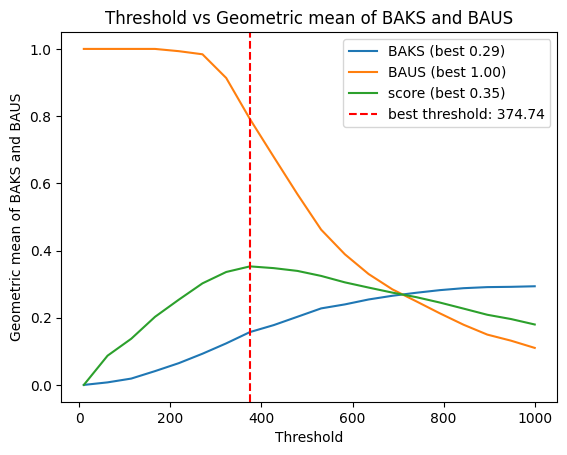

In [14]:
def plot_threshold_score(df, col="threshold"):
    best_score = df["score"].max()
    best_threshold = df[col][df["score"].idxmax()]

    # plot baus and baks
    plt.plot(
        df[col],
        df["baks"],
        label=f"BAKS (best {df['baks'].max():.2f})",
    )
    plt.plot(
        df[col],
        df["baus"],
        label=f"BAUS (best {df['baus'].max():.2f})",
    )
    plt.plot(
        df[col],
        df["score"],
        label=f"score (best {best_score:.2f})",
    )
    # line at the best threshold
    plt.axvline(
        best_threshold,
        color="red",
        linestyle="--",
        label=f"best threshold: {best_threshold:.2f}",
    )
    plt.xlabel("Threshold")
    plt.ylabel("Geometric mean of BAKS and BAUS")
    plt.title("Threshold vs Geometric mean of BAKS and BAUS")
    plt.legend()
    plt.show()


plot_threshold_score(base_threshold_df)

{'initial_threshold': np.float32(531.76416), 'mad': np.float32(165.72833)}

  0%|          | 0/100 [00:00<?, ?it/s]100%|██████████| 100/100 [00:34<00:00,  2.90it/s]


,threshold,baks,baus,score,k
0,34.579163,0.003858,1.000000,0.062117,-3.000000
1,44.623304,0.003858,1.000000,0.062117,-2.939394
2,54.667445,0.003858,1.000000,0.062117,-2.878788
3,64.711587,0.010212,1.000000,0.101053,-2.818182
4,74.755728,0.012687,1.000000,0.112636,-2.757576
...,...,...,...,...,...
95,988.772592,0.293495,0.111571,0.180957,2.757576
96,998.816734,0.293626,0.110161,0.179850,2.818182
97,1008.860875,0.294245,0.110161,0.180040,2.878788
98,1018.905016,0.294554,0.109186,0.179336,2.939394


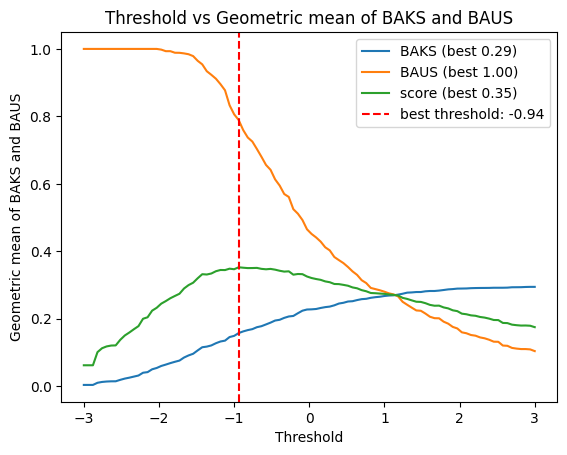

In [ ]:
# keeping some old numbers when we compared train to test
# initial_threshold = 583.8616943359375
# mad = 180.09857177734375
# best k = -1.18 -> 371
# afterwards when we just look at the train set
# initial_threshold = 531.76
# mad = 165.7
# best k = -0.94

initial_threshold = np.median(distances)
mad = np.median(np.abs(distances - initial_threshold))
display(
    {
        "initial_threshold": initial_threshold,
        "mad": mad,
    }
)
k = np.linspace(-3, 3, 100)
mad_threshold_df = search_threshold(
    train_df, val_df, initial_threshold + (np.linspace(-3, 3, 100) * mad)
)
# add k as a column
mad_threshold_df["k"] = k
display(mad_threshold_df)
plot_threshold_score(mad_threshold_df, col="k")

In [ ]:
# at the highest score, get the value of k
# this basically runs the test against our best validation hyperparameters
best_k = mad_threshold_df["k"][mad_threshold_df["score"].idxmax()]
threshold = initial_threshold + (mad * best_k)
display(
    {
        "best_k": best_k,
        "mad": mad,
        "threshold": threshold,
        "val_baks": mad_threshold_df["baks"].max(),
        "val_baus": mad_threshold_df["baus"].max(),
        "val_score": mad_threshold_df["score"].max(),
    }
)
identity_other_only = sorted(
    set(test_df.identity.unique()) - set(train_df.identity.unique())
)
predictions = make_prediction(train_df, test_df, threshold)
baks = BAKS(test_df["identity"].values, predictions, identity_other_only)
baus = BAUS(
    test_df["identity"].values, predictions, identity_other_only, "new_individual"
)
# geometric average
score = np.sqrt(baks * baus)
display(
    {
        "test_baks": baks,
        "test_baus": baus,
        "test_score": score,
    }
)

{'best_k': np.float64(-0.9393939393939394),
 'threshold': np.float64(376.0799690015388),
 'val_baks': np.float64(0.29455441454398845),
 'val_baus': np.float64(0.9999999999999989),
 'val_score': np.float64(0.352629267153044)}

{'test_baks': np.float64(0.12910978756455332),
 'test_baus': np.float64(0.8030443829323359),
 'test_score': np.float64(0.3219951702825707)}

In [20]:
# retune on the test set to get a new best threshold and see if
# this improves the score
new_train_df = pd.concat([train_df, val_df])
distances = get_min_distance_to_neighbor(new_train_df)
mad = np.median(np.abs(distances - np.median(distances)))
initial_threshold = np.median(distances)
new_threshold_df = search_threshold(
    new_train_df, test_df, initial_threshold + (np.linspace(-3, 3, 100) * mad)
)

100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


In [21]:
best_k = mad_threshold_df["k"][mad_threshold_df["score"].idxmax()]
threshold = initial_threshold + (mad * best_k)
display(
    {
        "initial_threshold": initial_threshold,
        "mad": mad,
        "best_k": best_k,
        "threshold": threshold,
    }
)
identity_other_only = sorted(
    set(test_df.identity.unique()) - set(new_train_df.identity.unique())
)
predictions = make_prediction(new_train_df, test_df, threshold)
baks = BAKS(test_df["identity"].values, predictions, identity_other_only)
baus = BAUS(
    test_df["identity"].values, predictions, identity_other_only, "new_individual"
)
# geometric average
score = np.sqrt(baks * baus)
display(
    {
        "test_baks": baks,
        "test_baus": baus,
        "test_score": score,
    }
)
# this is the best score we can get with this method

{'initial_threshold': np.float32(531.76416),
 'mad': np.float32(165.72833),
 'best_k': np.float64(-0.9393939393939394),
 'threshold': np.float64(376.0799690015388)}

{'test_baks': np.float64(0.18978642449100108),
 'test_baus': np.float64(0.7533003360306184),
 'test_score': np.float64(0.3781086845645319)}

Looks like the score increases if we include more items in the training dataset. This intuitively makes sense because we have more distances to look at.

# final prediction

In [23]:
# now for the final prediction
known_df = pdf[pdf.identity.notnull()]
unknown_df = pdf[pdf.identity.isnull()]

distances = get_min_distance_to_neighbor(known_df)
mad = np.median(np.abs(distances - np.median(distances)))
initial_threshold = np.median(distances)
best_k = -0.9393939393939394
display(
    {
        "initial_threshold": initial_threshold,
        "mad": mad,
        "best_k": best_k,
        "threshold": initial_threshold + (mad * best_k),
    }
)
# we already know from our validation set that we should use k=-1.182

predictions = make_prediction(known_df, unknown_df, initial_threshold + (mad * best_k))
# count how many are predicted as "unknown"
display(
    {
        "unknown": len(predictions[predictions == "new_individual"]),
        "known": len(predictions[predictions != "new_individual"]),
        "total": len(predictions),
    }
)

100%|██████████| 13074/13074 [01:26<00:00, 151.42it/s]


{'initial_threshold': np.float32(509.70102),
 'mad': np.float32(157.52377),
 'best_k': -0.9393939393939394,
 'threshold': np.float32(361.72412)}

{'unknown': 1561, 'known': 574, 'total': 2135}

In [32]:
# save this result
unknown_df["identity"] = predictions
output_path = Path.home() / "shared/animalclef/data/predictions/20250313-baseline.csv"
output_path.parent.mkdir(parents=True, exist_ok=True)
unknown_df[["image_id", "identity"]].to_csv(output_path, index=False, header=True)

/tmp/ipykernel_140528/3574070120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_df["identity"] = predictions


## salamanders only

,Split,Num Individuals,Num Images,Train Image Overlap,Val Image Overlap,Test Image Overlap,Train Image %,Val Image %,Test Image %,Known Individuals,Unknown Individuals
0,Train,107,221,221,0,0,100.0,0.0,0.0,107,0
1,Validation,121,198,0,198,0,0.0,100.0,0.0,107,14
2,Test,165,463,0,0,463,0.0,0.0,100.0,107,58


100%|██████████| 100/100 [00:04<00:00, 23.49it/s]


,threshold,baks,baus,score,k
0,176.465454,0.066978,1.000000,0.258801,-3.000000
1,180.606776,0.066978,1.000000,0.258801,-2.939394
2,184.748099,0.066978,1.000000,0.258801,-2.878788
3,188.889421,0.071651,1.000000,0.267677,-2.818182
4,193.030743,0.071651,1.000000,0.267677,-2.757576
...,...,...,...,...,...
95,569.891071,0.165109,0.078571,0.113898,2.757576
96,574.032393,0.165109,0.078571,0.113898,2.818182
97,578.173715,0.165109,0.078571,0.113898,2.878788
98,582.315038,0.165109,0.078571,0.113898,2.939394


{'initial_threshold': np.float32(381.4609),
 'mad': np.float32(68.33182),
 'best_k': np.float64(-1.3636363636363635),
 'threshold': np.float64(288.2811556729404)}

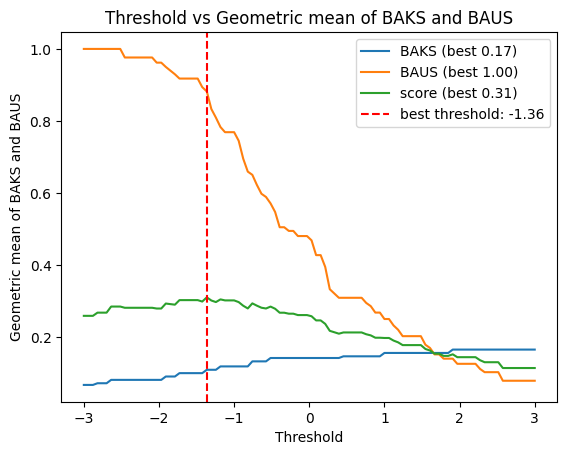

In [35]:
# what happens if we limit this just to salamanders?
# we have to tune again

cond = (
    (~pdf.identity.isnull())
    & (pdf.identity_count > 2)
    & (pdf.dataset == "SalamanderID2025")
)
train_df, val_df, test_df = split_reid_data(pdf[cond])
display(summarize_split(train_df, val_df, test_df))

distances = get_min_distance_to_neighbor(train_df)
mad = np.median(np.abs(distances - np.median(distances)))
initial_threshold = np.median(distances)

# now find the best threshold for k
mad_threshold_df = search_threshold(
    train_df, val_df, initial_threshold + (np.linspace(-3, 3, 100) * mad)
)
# add k as a column
mad_threshold_df["k"] = np.linspace(-3, 3, 100)
display(mad_threshold_df)
best_k = mad_threshold_df["k"][mad_threshold_df["score"].idxmax()]
threshold = initial_threshold + (mad * best_k)
display(
    {
        "initial_threshold": initial_threshold,
        "mad": mad,
        "best_k": best_k,
        "threshold": threshold,
    }
)

plot_threshold_score(mad_threshold_df, col="k")

In [37]:
# now for the final prediction
known_df = pdf[pdf.identity.notnull() & (pdf.dataset == "SalamanderID2025")]
unknown_df = pdf[pdf.identity.isnull()]

distances = get_min_distance_to_neighbor(known_df)
mad = np.median(np.abs(distances - np.median(distances)))
initial_threshold = np.median(distances)
best_k = best_k
display(
    {
        "initial_threshold": initial_threshold,
        "mad": mad,
        "best_k": best_k,
        "threshold": initial_threshold + (mad * best_k),
    }
)
# we already know from our validation set that we should use k=-1.182

predictions = make_prediction(known_df, unknown_df, initial_threshold + (mad * best_k))
# count how many are predicted as "unknown"
display(
    {
        "unknown": len(predictions[predictions == "new_individual"]),
        "known": len(predictions[predictions != "new_individual"]),
        "total": len(predictions),
    }
)

 12%|█▏        | 173/1388 [00:00<00:01, 832.97it/s]100%|██████████| 1388/1388 [00:02<00:00, 587.73it/s]


{'initial_threshold': np.float32(330.07166),
 'mad': np.float32(61.96466),
 'best_k': np.float64(-1.3636363636363635),
 'threshold': np.float64(245.57439075816762)}

{'unknown': 1959, 'known': 176, 'total': 2135}

In [38]:
# write this result
output_path = (
    Path.home() / "shared/animalclef/data/predictions/20250313-baseline-salamanders.csv"
)
output_path.parent.mkdir(parents=True, exist_ok=True)
unknown_df["identity"] = predictions
unknown_df[["image_id", "identity"]].to_csv(output_path, index=False, header=True)

/tmp/ipykernel_140528/3763745859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_df["identity"] = predictions


In [39]:
! kaggle competitions submit -c animal-clef-2025 -f {output_path} -m "baseline salamanders only"

100%|███████████████████████████████████████| 42.9k/42.9k [00:00<00:00, 144kB/s]
Successfully submitted to AnimalCLEF25 @ CVPR-FGVC & LifeCLEF